In [1093]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
print("Setup complete")

Setup complete


In [1094]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [1095]:
df['Embarked'] = df['Embarked'].astype(str)
df_test['Embarked'] = df_test['Embarked'].astype(str)

In [1096]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1097]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1098]:
df.shape

(891, 12)

In [1099]:
print(len(df['PassengerId']), len(df['Name']))

891 891


In [1100]:
psgId = df_test['PassengerId']

In [1101]:
df_test.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

# FEATURE ENGINEERING

In [1102]:
ctg = [var for var in df.columns if (df[var].dtype == 'O')]
numerical = [var for var in df.columns if (df[var].dtype != 'O')]

In [1103]:
Survived = df['Survived']
df.drop(['Survived'], axis = 1, inplace = True)

In [1104]:
df_test_copy = df_test.copy()
df_copy = df.copy()

# CUSTOME FEATURE ENGINEERING

In [1105]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [1106]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [1107]:
Data = pd.concat([df, df_test], ignore_index=True, sort = False)

In [1108]:
Data.isnull().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

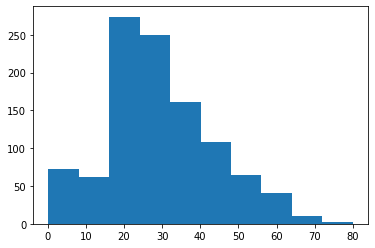

In [1109]:
Age = Data['Age']
plt.hist(x = Age)

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

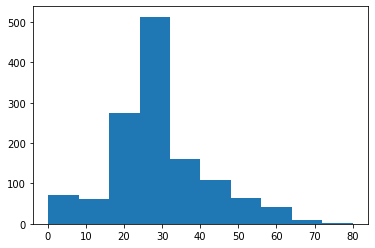

In [1110]:
#skewed data so no use of mean it will biased
Data['Age'].fillna(Data['Age'].median(), inplace = True)
plt.hist(x = Data['Age'])

In [1111]:
Data['Age'].isnull().sum()

0

(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

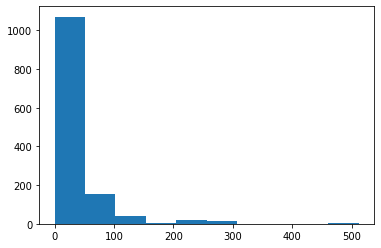

In [1112]:
plt.hist(x = Data['Fare'])

In [1113]:
Data['Fare'].fillna(Data['Fare'].mode()[0], inplace = True)

In [1114]:
Data.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [1115]:
def Segregate(data):
    nullIndex = data[data['Cabin'].isnull()].index.tolist()
    index = [x for x in range(len(data)) if (x not in nullIndex)]
    return[Data.iloc[index], Data.iloc[nullIndex]]

In [1116]:
packedData = Segregate(Data)

In [1117]:
train = packedData[0]

print(train.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [1118]:
y = train['Cabin']
X = train.drop(['Cabin'], axis = 1)

In [1119]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,female,35.0,1,0,113803,53.1000,S
6,1,male,54.0,0,0,17463,51.8625,S
10,3,female,4.0,1,1,PP 9549,16.7000,S
11,1,female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...
1295,1,male,43.0,1,0,17765,27.7208,C
1296,2,male,20.0,0,0,SC/PARIS 2166,13.8625,C
1298,1,male,50.0,1,1,113503,211.5000,C
1302,1,female,37.0,1,0,19928,90.0000,Q


In [1120]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [1121]:
import category_encoders as ce
ctg.remove('Cabin')
encoder1 = ce.BinaryEncoder(cols = ['Sex'])
encoder2 = ce.HelmertEncoder(cols = ['Ticket'])
encoder3 = ce.OrdinalEncoder(cols = ['Embarked'])
X = encoder1.fit_transform(X)
X = encoder2.fit_transform(X)
X = encoder3.fit_transform(X)

/home/adleon/miniconda3/envs/ryednap/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [1122]:
from sklearn.model_selection import train_test_split

In [1123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [1124]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

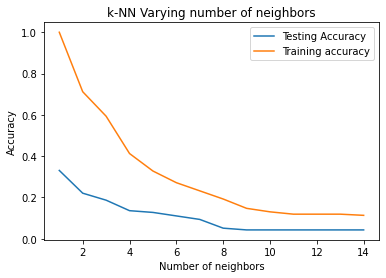

In [1125]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1126]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [1127]:
#Fit the model|
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [1128]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.3305084745762712